# Exploratory Notebook
> Claus Martinsen - TDT05 Project 2

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
np.random.seed(42)
pd.set_option('display.max_columns', 30)

## Data import

In [3]:
TRAINING_DATA = "../data/challenge2_train.csv"
train_df = pd.read_csv(TRAINING_DATA)

In [4]:
TESTING_DATA = "../data/challenge2_test.csv"
test_df = pd.read_csv(TESTING_DATA)

### At a glanse

In [5]:
train_df.describe()

id        target            f0           f1            f2  \
count  50000.000000  50000.000000  45122.000000  50000.00000  48816.000000   
mean   24999.500000      0.225320   1017.678647     23.49612      5.018887   
std    14433.901067      0.417797      7.130390     14.01738      0.007177   
min        0.000000      0.000000    982.000000      0.00000      4.998000   
25%    12499.750000      0.000000   1013.000000     11.00000      5.014000   
50%    24999.500000      0.000000   1017.600000     23.00000      5.019100   
75%    37499.250000      0.000000   1022.500000     35.00000      5.024100   
max    49999.000000      1.000000   1040.900000     48.00000      5.045800   

                 f3            f5            f6            f7            f9  \
count  49677.000000  26130.000000  46648.000000  49517.000000  49497.000000   
mean      16.998782      7.628550     40.050999     14.000848      0.222862   
std        6.520973      3.776794     13.655620      8.936280      0.416171   
min       -6.200000      0.000000      7.000000      0.000000      0.000000   
25%       12.300000      4.900000     31.000000      7.000000      0.000000   
50%       16.700000      8.500000     39.000000     13.000000      0.000000   
75%       21.600000     10.600000     48.000000     19.000000      0.000000   
max       39.100000     14.300000    130.000000     87.000000      1.000000   

                f10          f11           f13           f14           f15  \
count  28585.000000  49894.00000  49497.000000  29937.000000  49057.000000   
mean       5.463607     23.23301      2.379215      4.508668     18.686630   
std        4.251483      7.15277      8.795403      2.717503      8.842879   
min        0.000000     -4.10000      0.000000      0.000000      0.000000   
25%        2.600000     17.90000      0.000000      2.000000     13.000000   
50%        4.800000     22.60000      0.000000      5.000000     19.000000   
75%        7.400000     28.30000      0.800000      7.000000     24.000000   
max      145.000000     46.80000    371.000000      9.000000     87.000000   

                f16           f18           f19           f20           f22  \
count  49020.000000  48749.000000  45121.000000  31245.000000  49746.000000   
mean      21.683570      7.305524   1015.285913      4.428837     12.191203   
std        6.970918      3.546719      7.057875      2.884968      6.414481   
min       -5.100000      0.000000    978.200000      0.000000     -8.500000   
25%       16.600000      5.000000   1010.500000      1.000000      7.600000   
50%       21.100000      7.000000   1015.300000      5.000000     12.000000   
75%       26.500000     10.000000   1020.100000      7.000000     16.900000   
max       46.100000     13.000000   1038.500000      9.000000     33.900000   

                f23           f24  
count  25160.000000  49398.000000  
mean      52.013712     68.806470  
std        8.323467     19.024988  
min       37.000000      1.000000  
25%       45.000000     57.000000  
50%       52.000000     70.000000  
75%       59.000000     83.000000  
max       66.000000    100.000000

In [6]:
train_df.head()

id  target      f0  f1      f2    f3   f4    f5    f6    f7 f8   f9  f10  \
0   0       0  1013.1   0  5.0190  26.1  bbd  11.1  33.0  11.0  m  0.0  3.6   
1   1       0  1010.2   1  5.0142  10.4    n   NaN  46.0  17.0  k  0.0  0.8   
2   2       0  1014.4   2  5.0280  12.3  xnx   NaN  31.0  13.0  c  1.0  NaN   
3   3       0  1019.2   3  5.0335  23.0   nx  11.6  41.0   9.0  i  0.0  8.0   
4   4       0  1027.6   4  5.0129   7.3    d   7.3  28.0  15.0  h  1.0  0.2   

    f11        f12   f13  f14   f15   f16  f17   f18     f19  f20  f21   f22  \
0  29.0  be42001f3   0.0  0.0  19.0  27.8  bbd   6.0  1008.9  1.0   nd  17.4   
1  14.4  3aad93cab   0.8  4.0  22.0  12.7    n  12.0  1012.4  5.0   nx   6.8   
2  15.4  90116a97d  14.6  NaN   9.0  13.0  nnd   7.0  1016.1  NaN   nx  10.1   
3  33.4  dc4ee566b   0.0  0.0  17.0  32.3   nx  10.0  1016.6  1.0  dnd  14.4   
4  14.3  f09cc205f  10.0  1.0  13.0  13.7  dnd   7.0  1024.4  7.0  dbd   6.8   

    f23   f24  
0  61.0  63.0  
1  55.0  80.0  
2  61.0  70.0  
3   NaN  40.0  
4  47.0  92.0

### Unique values

In [7]:
from matplotlib.ticker import ScalarFormatter

def plot_unique(df: pd.DataFrame):
    unique_count = df.nunique()

    fig, ax = plt.subplots(figsize=(15, 5))
    unique_rects =  ax.bar(unique_count.index, unique_count)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(unique_rects)

    ax.set_yscale("log")
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.set_ylabel("No. unique values")
    ax.set_xlabel("Features")
    ax.set_title("Log. plot of unique values per feature")
    
    plt.show()

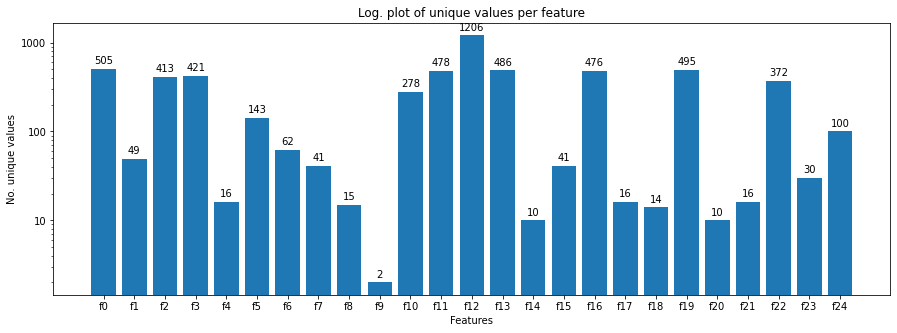

In [8]:
plot_unique(train_df.drop(columns=["id", "target"]))
# train_df.nunique()

### Correlation

In [9]:
def plot_correlation(df: pd.DataFrame):
    correlation_mat = df.corr()
    f, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(correlation_mat, vmax=0.8, square=True)

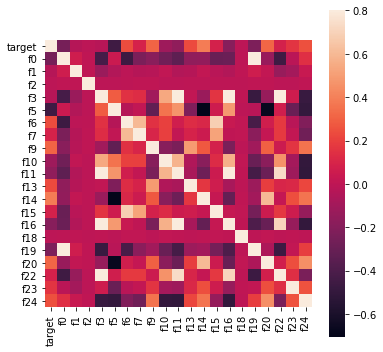

In [10]:
plot_correlation(train_df.drop(columns=["id"]))

### Missing values

In [11]:
def count_missing(df: pd.DataFrame) -> pd.DataFrame:
    total = df.isna().sum().sort_values(ascending=False)
    percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [12]:
count_missing(train_df)

Total  Percent
f23     24840  0.49680
f5      23870  0.47740
f10     21415  0.42830
f14     20063  0.40126
f20     18755  0.37510
f19      4879  0.09758
f0       4878  0.09756
f21      3584  0.07168
f4       3379  0.06758
f6       3352  0.06704
f12      1513  0.03026
f8       1460  0.02920
f17      1370  0.02740
f18      1251  0.02502
f2       1184  0.02368
f16       980  0.01960
f15       943  0.01886
f24       602  0.01204
f9        503  0.01006
f13       503  0.01006
f7        483  0.00966
f3        323  0.00646
f22       254  0.00508
f11       106  0.00212
f1          0  0.00000
target      0  0.00000
id          0  0.00000

### Distribution plots

In [30]:
def plot_distribution(df: pd.DataFrame, columns: pd.Index):
    #sns.pairplot(df[columns], size = 2.5)
    
    sns.set(rc={'figure.figsize':(20,20)})
    subplot_dim = math.ceil(math.sqrt(len(columns)))
    
    fig, axes = plt.subplots(subplot_dim, subplot_dim)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, column in enumerate(columns):
        if df[column].dtype == "O":
            sns.countplot(df[column], ax=axes[i // subplot_dim][i % subplot_dim])
        else:
            sns.histplot(df[column], ax=axes[i // subplot_dim][i % subplot_dim])
    
    plt.show()

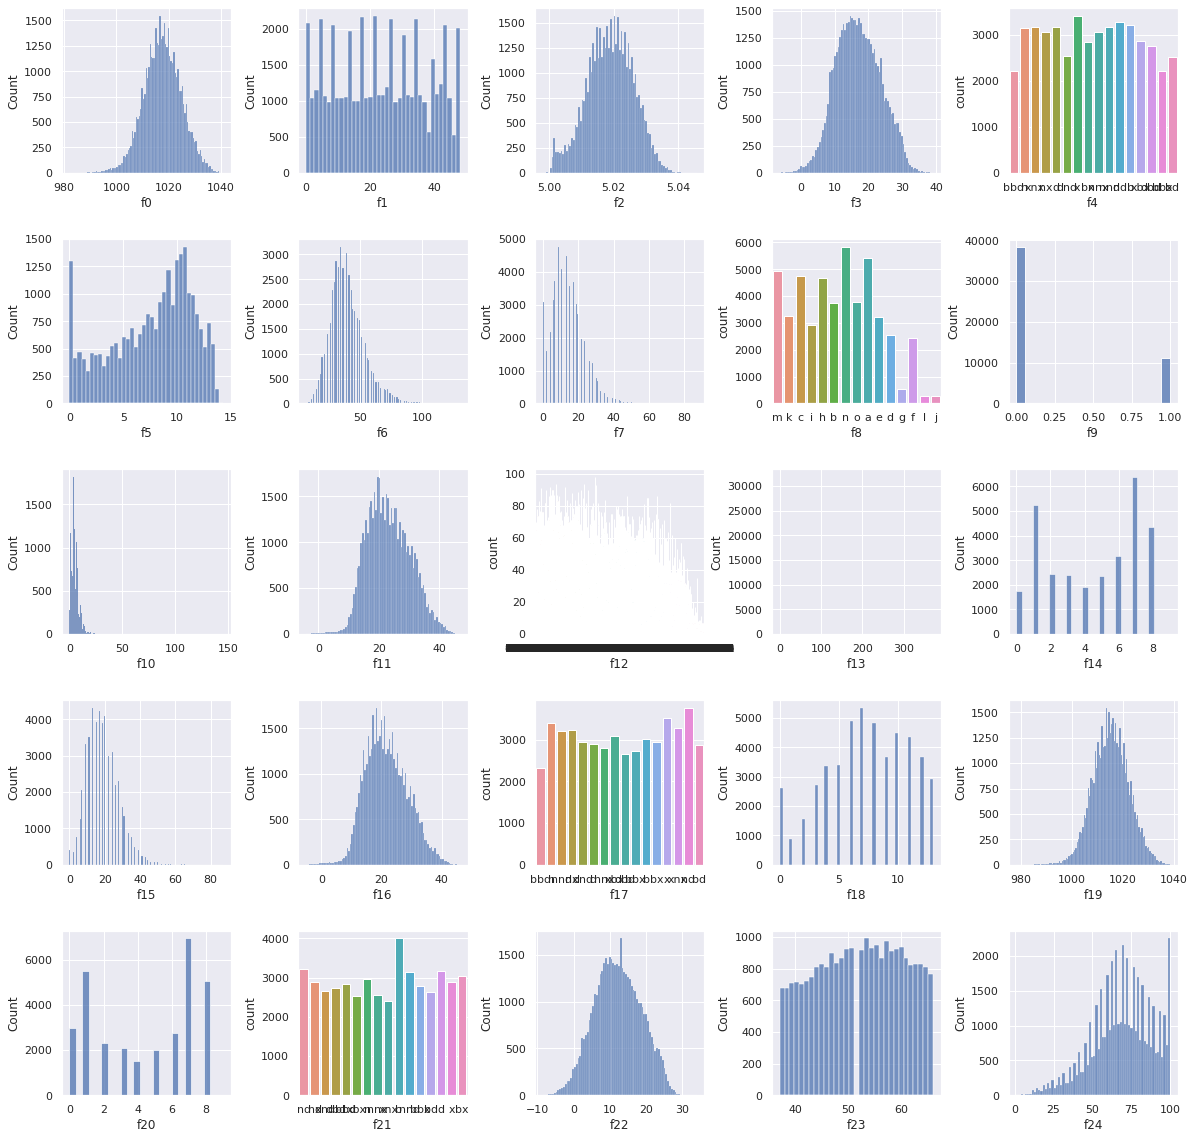

In [31]:
columns = train_df.drop(columns=["id", "target"]).columns

plot_distribution(train_df, columns)

## Feature Engineering and Normalization

In [ ]:
# TODO: Do FE and norm